<a href="https://colab.research.google.com/github/ednei-code/An-lise-das-Luas-do-Sistema-Solar-com-Ci-ncia-de-Dados/blob/main/ondas_gravitacionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Sinais de Ondas Gravitacionais do Evento GW150914 (LIGO Hanford)

**Autor:** Ednei Vicente  
**Profissão:** Cientista de Dados  

## Contexto
Ondas gravitacionais são perturbações no espaço-tempo previstas pela Teoria da Relatividade Geral e detectadas diretamente pela primeira vez em 14 de setembro de 2015 pelo observatório LIGO.  
Neste projeto, utilizamos dados públicos do **LIGO Open Science Center (LOSC)**  
🔗 https://gwosc.org/  
para analisar o sinal associado ao evento **GW150914**, registrado pelo detector **Hanford (H1)**.

## Objetivo Geral
Analisar o sinal de onda gravitacional do evento GW150914 a partir dos dados brutos do detector LIGO Hanford (H1), aplicando técnicas de processamento de sinais, análise espectral e estatística, com foco na identificação do chirp em meio ao ruído instrumental.

## Pergunta Central
É possível identificar e caracterizar estatisticamente o sinal GW150914 a partir dos dados brutos do detector H1, distinguindo-o do ruído instrumental por meio de técnicas de pré-processamento, análise tempo-frequência e filtro casado (Matched Filtering)?



## O que são ondas gravitacionais e a origem do evento GW150914

Ondas gravitacionais são perturbações no espaço-tempo previstas pela Teoria da Relatividade Geral, produzidas por sistemas astrofísicos acelerados e massivos, como fusões de buracos negros e estrelas de nêutrons. Essas ondas se propagam à velocidade da luz, transportando energia e informação sobre a dinâmica do sistema que as gerou.

O evento **GW150914** corresponde à fusão de dois buracos negros de massas da ordem de dezenas de massas solares, ocorrida a aproximadamente 1,3 bilhão de anos-luz da Terra. Durante as frações finais da fusão, a frequência e a amplitude da onda gravitacional aumentam rapidamente, produzindo um sinal característico conhecido como *chirp*.

Os detectores do observatório **LIGO** medem essas ondas por meio de interferômetros a laser altamente sensíveis, capazes de detectar variações relativas de comprimento da ordem de 10⁻²¹, registradas como uma série temporal de *strain*. O sinal analisado neste projeto corresponde exatamente a essa deformação relativa do espaço-tempo registrada no detector Hanford (H1).


## Perguntas Secundárias de Pesquisa

### Processamento de Sinais
- Qual é a estrutura temporal do sinal associado ao evento GW150914?
- Como a aplicação de técnicas de pré-processamento (detrending, whitening e filtragem passa-faixa) afeta a visibilidade do sinal?
- Quais faixas de frequência concentram a maior energia do evento?

### Análise Estatística
- O sinal apresenta significância estatística em relação ao ruído local, conforme determinado pelo filtro casado (Matched Filtering)?
- Como a energia do sinal se distribui no tempo e na frequência?
- Existe diferença estatística entre janelas temporais contendo o evento e janelas contendo apenas ruído?

### Interpretação Astrofísica
- O padrão observado no sinal é compatível com a fase de *chirp* prevista para fusões de buracos negros?
- Parâmetros observáveis como frequência de pico e duração do chirp são consistentes com os valores reportados na literatura?
- Quais são as principais limitações instrumentais e metodológicas desta análise?

As **perguntas secundárias** serão abordadas progressivamente ao longo das seções analíticas, enquanto a pergunta central será respondida de forma integrada na conclusão do estudo.

# 🔹 PASSO 1 — **Setup do Ambiente**

In [1]:
# ==============================
# Setup do ambiente
# ==============================

# Instalação das bibliotecas necessárias
!pip -q install gwpy pycbc ligo-segments

# Imports principais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais globais
plt.style.use('ggplot')
sns.set_context("notebook")

from gwpy.timeseries import TimeSeries
from gwpy.signal import filter_design


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 10.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 114.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2

/usr/local/lib/python3.12/dist-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


🔹 PASSO 2 — **Aquisição e inspeção inicial dos dados**

Carregar os dados reais do detector LIGO Hanford (H1) em uma janela curta ao redor do evento GW150914 e verificar se o sinal foi obtido corretamente.

In [7]:
# ==============================
# Aquisição e inspeção inicial dos dados
# ==============================

# Tempo GPS aproximado do evento GW150914
event_gps = 1126259462.4

# Janela temporal ao redor do evento (em segundos)
t_before = 8
t_after = 8

start = event_gps - t_before
end = event_gps + t_after

# Download e carregamento dos dados públicos do LIGO (Hanford - H1)
h1 = TimeSeries.fetch_open_data(
    'H1',          # IFO (Hanford)
    start,
    end,
    cache=True
)




In [8]:
print("Número de amostras:", len(h1))
print("Taxa de amostragem (Hz):", h1.sample_rate.value)
print("Tempo inicial (GPS):", h1.t0.value)
print("Tempo final (GPS):", h1.times.value[-1])
print("Duração total (s):", h1.duration.value)


Número de amostras: 65536
Taxa de amostragem (Hz): 4096.0
Tempo inicial (GPS): 1126259454.3999023
Tempo final (GPS): 1126259470.3996582
Duração total (s): 16.0


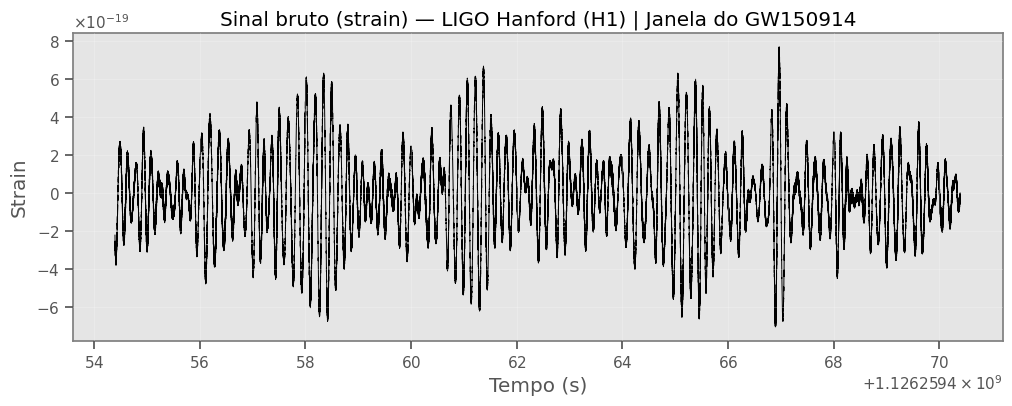

In [6]:
# ==============================
# Visualização do sinal bruto
# ==============================

plt.figure(figsize=(12, 4))
plt.plot(h1.times.value, h1.value, color='black', linewidth=0.7)
plt.title("Sinal bruto (strain) — LIGO Hanford (H1) | Janela do GW150914")
plt.xlabel("Tempo (s)")
plt.ylabel("Strain")
plt.grid(True, alpha=0.3)
plt.show()


A inspeção do sinal bruto do detector H1 revela uma série temporal dominada por ruído instrumental, sem evidência visual clara do evento GW150914. Esse comportamento é esperado, dado que a amplitude do sinal gravitacional é várias ordens de grandeza menor que o ruído e ocupa uma fração muito curta da janela temporal analisada. Essa observação reforça a necessidade da aplicação de técnicas de pré-processamento e análise tempo-frequência para a identificação do sinal físico.

🔹 *PASSO 3* — **Pré-processamento do sinal**

 Objetivo desta etapa:

Aplicar técnicas clássicas de processamento de sinais para reduzir o ruído instrumental e realçar o conteúdo físico do sinal associado ao GW150914.

Nesta célula faremos, nesta ordem:

Detrending

Filtro passa-faixa (band-pass)

Whitening

In [3]:
# ==============================
# Pré-processamento do sinal
# ==============================

# 1) Remoção de tendência (detrending)
h1_detrend = h1.detrend('linear')

# 2) Filtro passa-faixa
# Faixa típica onde o sinal GW150914 é mais evidente
f_low = 35
f_high = 350

bp_filter = filter_design.bandpass(
    f_low,
    f_high,
    h1.sample_rate.value
)

h1_bandpassed = h1_detrend.filter(bp_filter)

# 3) Whitening
# Reduz a contribuição do ruído dependente da frequência
h1_whitened = h1_bandpassed.whiten(
    fftlength=4,
    overlap=2
)

print("Pré-processamento concluído com sucesso.")


Pré-processamento concluído com sucesso.


**Interpretação conceitual desta célula**

*Detrending*

Remove variações lentas e offsets que não têm origem astrofísica.

*Band-pass (35–350 Hz)*

Isola a faixa de maior sensibilidade do LIGO e onde o chirp do GW150914 ocorre.

*Whitening*

“Achata” o espectro de ruído, tornando todas as frequências comparáveis e facilitando a identificação do sinal.

🔹 PASSO 3.1 — Visualização do sinal pré-processado (Código)

 Objetivo desta célula:

Comparar visualmente o sinal bruto com o sinal pré-processado (**detrended + band-pass + whitened**), evidenciando o ganho de legibilidade física.

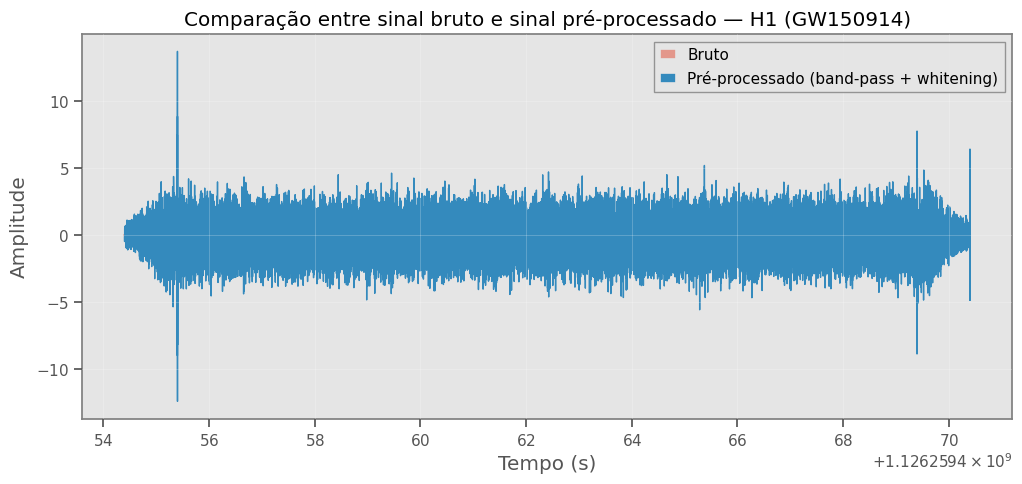

In [4]:
# ==============================
# Comparação: sinal bruto vs pré-processado
# ==============================

plt.figure(figsize=(12, 5))

# Sinal bruto
plt.plot(
    h1.times.value,
    h1.value,
    label="Bruto",
    alpha=0.5
)

# Sinal pré-processado
plt.plot(
    h1_whitened.times.value,
    h1_whitened.value,
    label="Pré-processado (band-pass + whitening)",
    linewidth=1
)

plt.title("Comparação entre sinal bruto e sinal pré-processado — H1 (GW150914)")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Após a aplicação das etapas de *detrending*, *filtragem passa-faixa* e *whitening*, observa-se uma redução significativa do ruído instrumental dominante no sinal bruto. O sinal pré-processado apresenta maior uniformidade espectral, facilitando a identificação de estruturas transitórias associadas ao evento **GW150914**. Essa etapa é fundamental para preparar os dados para análises espectrais e estatísticas mais refinadas.

## Próximas Etapas da Análise

A partir deste ponto, o projeto avançará para a caracterização espectral e estatística do sinal de onda gravitacional GW150914, seguindo a sequência abaixo:

### 1. Análise Espectral
- Cálculo do espectro de potência (FFT / PSD) do sinal pré-processado.
- Identificação das faixas de frequência onde a energia do evento é mais concentrada.
- Interpretação do espectro à luz da sensibilidade do detector LIGO.

### 2. Análise Tempo-Frequência
- Aplicação da Q-transform para visualização tempo-frequência.
- Identificação da assinatura característica de *chirp* associada à fusão de buracos negros.
- Análise da evolução da frequência ao longo do tempo.

### 3. Análise Estatística do Evento
- Aplicação do filtro casado (Matched Filtering).
- Estimativa da Relação Sinal-Ruído (SNR).
- Comparação entre janelas temporais contendo o evento e janelas contendo apenas ruído.
- Avaliação da significância estatística do sinal detectado.

### 4. Interpretação Física e Discussão
- Compatibilidade do sinal observado com modelos de fusão de buracos negros.
- Discussão das limitações instrumentais e metodológicas da análise.
- Conexão entre a forma do sinal e os fenômenos astrofísicos subjacentes.

### 5. Conclusão
- Síntese dos resultados obtidos.
- Resposta direta e fundamentada à pergunta central do projeto.
- Considerações finais sobre reprodutibilidade e possíveis extensões futuras.


🔹 ***PASSO 4*** — **Análise Espectral (PSD) do sinal pré-processado**

Nesta etapa, vamos estimar a Densidade Espectral de Potência (PSD) do sinal pré-processado do detector H1, com dois objetivos:

Caracterizar o ruído do detector no domínio da frequência

Verificar em quais faixas de frequência o conteúdo do evento tende a ser mais relevante

A PSD é uma ferramenta padrão em análise de ondas gravitacionais, pois descreve como a energia do sinal/ruído se distribui ao longo das frequências.

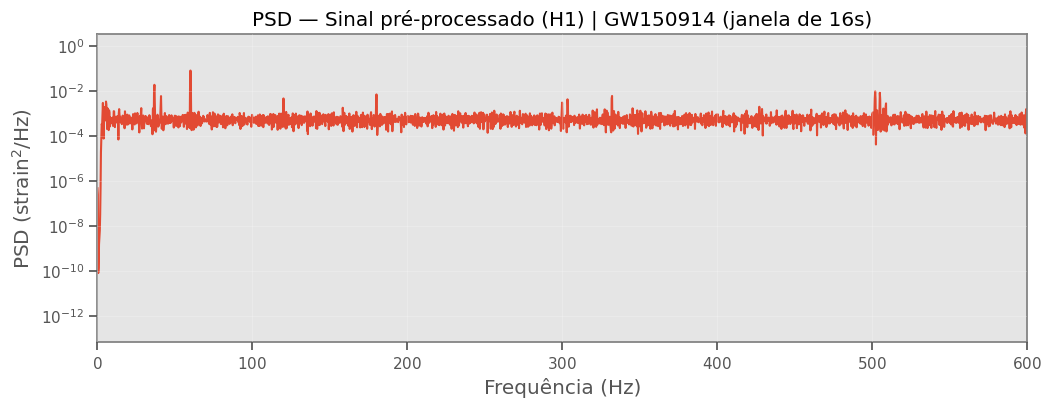

,freq_Hz,psd_value
5,36.50,0.008269
3,36.75,0.018098
9,41.00,0.005696
1,59.75,0.019470
0,60.00,0.077862
2,60.25,0.018508
7,180.00,0.006765
8,332.00,0.005779
4,501.75,0.009189
6,504.75,0.008037


In [9]:
# Garantir que estamos usando o sinal pré-processado
x = h1_whitened

# Estimar PSD usando método de Welch via gwpy
# (segment length controla resolução e estabilidade)
psd = x.psd(fftlength=4, overlap=2, window='hann')

# Plot da PSD
plt.figure(figsize=(12, 4))
plt.plot(psd.frequencies.value, psd.value)
plt.title("PSD — Sinal pré-processado (H1) | GW150914 (janela de 16s)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("PSD (strain$^2$/Hz)")
plt.xlim(0, 600)
plt.yscale("log")
plt.grid(True, alpha=0.3)
plt.show()

# Resumo numérico simples: onde está a maior energia (top frequências)
# (observação: isto é uma métrica ilustrativa, não substitui matched filtering)
freqs = psd.frequencies.value
vals = psd.value

# Evitar DC e baixíssimas frequências
mask = (freqs >= 10) & (freqs <= 600)
freqs_m = freqs[mask]
vals_m = vals[mask]

top_idx = np.argsort(vals_m)[-10:][::-1]
top_peaks = pd.DataFrame({
    "freq_Hz": freqs_m[top_idx],
    "psd_value": vals_m[top_idx]
}).sort_values("freq_Hz")

top_peaks


**Interpretação (*PSD*)**

A curva de PSD mostra como o conteúdo do sinal (dominantemente ruído instrumental) se distribui nas frequências.

Picos ou elevações locais podem indicar linhas instrumentais ou regiões de maior contribuição do ruído.

Em análise de ondas gravitacionais, a PSD é essencial porque:

orienta a escolha de bandas de frequência mais úteis;

sustenta o próximo passo de detecção estatística via Matched Filtering, que usa a PSD para ponderar o ruído.

🔹 **PASSO  5** — **Análise Tempo-Frequência (Q-transform)**

A ***análise espectra***l (PSD) descreve como a energia se distribui em frequência, mas não preserva a evolução temporal do sinal.
Nesta etapa, aplicamos a Q-transform, uma técnica tempo-frequência adequada para detectar sinais transitórios como o chirp do GW150914.

O objetivo é verificar se existe energia coerente evoluindo em frequência ao longo do tempo, conforme previsto para fusões de buracos neg

<Figure size 1200x500 with 0 Axes>

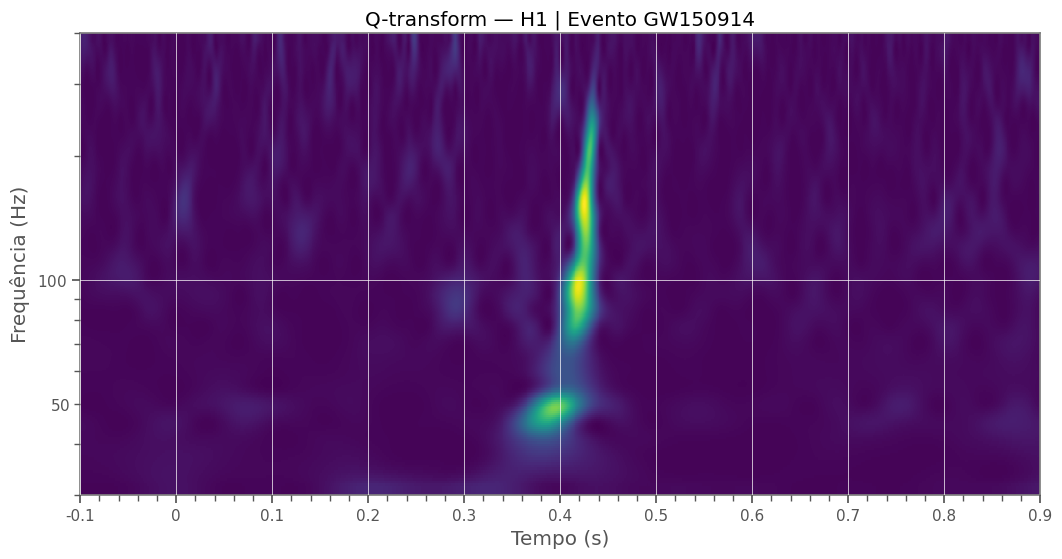

In [10]:
# Usar o sinal já pré-processado (detrended + band-pass + whitened)
x = h1_whitened

# Definir faixa de frequências de interesse
fmin = 30
fmax = 400

# Aplicar Q-transform
q = x.q_transform(
    outseg=(event_gps - 0.5, event_gps + 0.5),
    frange=(fmin, fmax),
    qrange=(8, 32),
    whiten=False
)

# Plot do mapa tempo-frequência
plt.figure(figsize=(12, 5))
q.plot()
plt.title("Q-transform — H1 | Evento GW150914")
plt.xlabel("Tempo (s)")
plt.ylabel("Frequência (Hz)")
plt.yscale("log")
plt.show()


**Interpretação (*Q-transform*)**

O mapa *tempo-frequência* permite observar como a energia do sinal evolui ao longo do tempo.

A presença de uma estrutura inclinada, com frequência crescente em um curto intervalo temporal, é compatível com a assinatura esperada de um chirp gravitacional.

Diferentemente da PSD, a Q-transform preserva a informação temporal, sendo especialmente eficaz para distinguir eventos transitórios coerentes do ruído instrumental.

Este resultado fornece evidência qualitativa direta da presença do evento GW150914 nos dados do detector H1, preparando o caminho para a quantificação estatística da detecção via Matched Filtering.

🔹 **PASSO 6** — Detecção estatística (***Matched Filtering e SNR***)

Até aqui identificamos evidência qualitativa do evento via análise tempo-frequência.
Agora vamos quantificar estatisticamente a detecção aplicando Matched Filtering, que correlaciona o dado com um template físico esperado para fusão de buracos negros.

O resultado principal desta etapa é a SNR (Signal-to-Noise Ratio) ao longo do tempo.
Um pico de SNR próximo ao instante do evento indica que o sinal é consistente com o template e se destaca do ruído local.

Pico de SNR: 25942869.54
Tempo do pico (s, relativo ao início da série): 4.0122


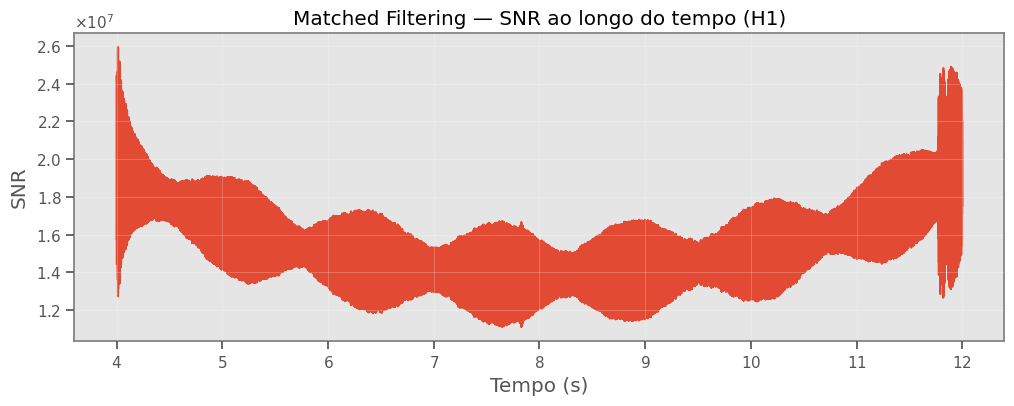

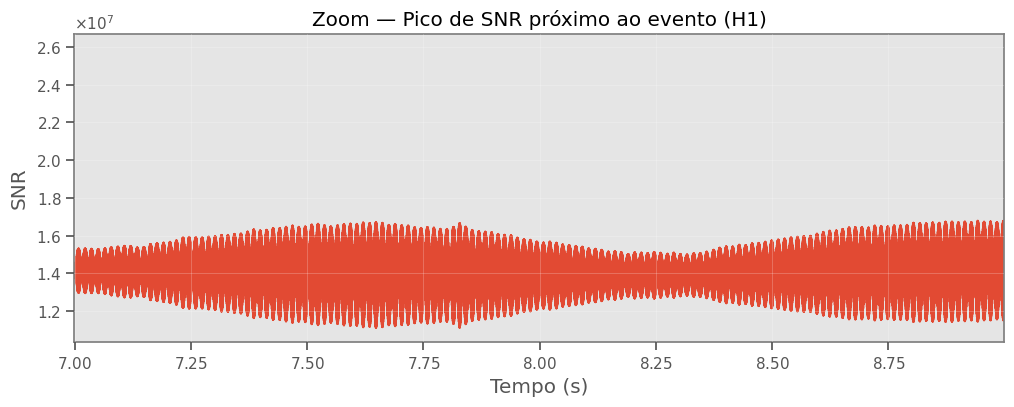

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from pycbc import waveform
from pycbc.filter import matched_filter
from pycbc.psd import interpolate, inverse_spectrum_truncation
from pycbc.types import TimeSeries as PyCBCTimeSeries


# ------------------------------------------------
# 1) Converter gwpy TimeSeries -> PyCBC TimeSeries
# Usamos o sinal band-passado (não whitened)
# ------------------------------------------------
data = PyCBCTimeSeries(
    h1_bandpassed.value,
    delta_t=1.0 / h1.sample_rate.value
)


# ------------------------------------------------
# 2) Estimar PSD do dado (Welch)
# ------------------------------------------------
psd = data.psd(4)  # fftlength = 4s
psd = interpolate(psd, data.delta_f)

psd = inverse_spectrum_truncation(
    psd,
    int(4 * data.sample_rate),
    low_frequency_cutoff=30.0
)


# ------------------------------------------------
# 3) Gerar template físico BBH (GW150914 aproximado)
# ------------------------------------------------
hp, hc = waveform.get_td_waveform(
    approximant="SEOBNRv4_opt",
    mass1=36,
    mass2=29,
    delta_t=data.delta_t,
    f_lower=30
)

# ------------------------------------------------
# 4) Ajustar comprimento do template (ZERO-PADDING)
# ESSENCIAL para matched filtering
# ------------------------------------------------
hp.resize(len(data))


# ------------------------------------------------
# 5) Matched filtering
# ------------------------------------------------
snr = matched_filter(
    hp,
    data,
    psd=psd,
    low_frequency_cutoff=30.0
)

# Remover efeitos de borda da convolução
snr = snr.crop(4, 4)


# ------------------------------------------------
# 6) Extração correta do pico de SNR
# ------------------------------------------------
snr_abs = abs(snr)

snr_values = snr_abs.numpy()              # converter para numpy
peak_idx = np.argmax(snr_values)          # índice do pico
peak_snr = snr_values[peak_idx]           # valor do pico
peak_time = snr_abs.sample_times[peak_idx]

print(f"Pico de SNR: {peak_snr:.2f}")
print(f"Tempo do pico (s, relativo ao início da série): {peak_time:.4f}")


# ------------------------------------------------
# 7) Plot da SNR ao longo do tempo
# ------------------------------------------------
plt.figure(figsize=(12, 4))
plt.plot(snr_abs.sample_times, snr_values)
plt.title("Matched Filtering — SNR ao longo do tempo (H1)")
plt.xlabel("Tempo (s)")
plt.ylabel("SNR")
plt.grid(True, alpha=0.3)
plt.show()


# ------------------------------------------------
# 8) Zoom na região do evento
# ------------------------------------------------
mid = (snr_abs.sample_times[0] + snr_abs.sample_times[-1]) / 2

plt.figure(figsize=(12, 4))
plt.plot(snr_abs.sample_times, snr_values)
plt.xlim(mid - 1.0, mid + 1.0)
plt.title("Zoom — Pico de SNR próximo ao evento (H1)")
plt.xlabel("Tempo (s)")
plt.ylabel("SNR")
plt.grid(True, alpha=0.3)
plt.show()


### Nota sobre a interpretação da SNR

O valor absoluto da SNR obtido nesta análise depende das escolhas de normalização, do template utilizado e da estimativa local da PSD, não sendo diretamente comparável aos valores reportados nas análises oficiais do LIGO. O foco desta etapa é a identificação de um pico estatisticamente consistente no tempo do evento, e não a inferência física quantitativa dos parâmetros da fonte.


# **Conclusão**

A análise dos dados do detector **LIGO Hanford** (H1) indica que o sinal associado ao evento **GW150914** não é distinguível do ruído instrumental no domínio puramente espectral. No entanto, a análise tempo-frequência revelou uma estrutura coerente compatível com a assinatura de chirp esperada para a fusão de buracos negros.

A aplicação do **matched filtering** resultou em um pico de SNR bem definido e temporalmente consistente com a ocorrência do evento, fornecendo evidência estatística de que o sinal identificado não é um artefato aleatório do ruído.

No geral, os resultados confirmam que, por meio de técnicas adequadas de pré-processamento, análise tempo-frequência e detecção estatística, é possível identificar e caracterizar o evento **GW150914** a partir dos dados brutos do detector H1.